# **Cab booking system**

Cab booking system is the process where renting a cab is automated through an app throughout a city. Using this app people can book a cab from one location to another location. Being a cab booking app company, exploiting an understanding of cab supply and demand could increase the efficiency of their service and enhance user experience by minimizing waiting time.

Refer the code at [GitHub](https://github.com/ypslearnings/CabBookingSystem/tree/main)

**Objective** of this project is to combine historical usage pattern along with the open data sources like weather data to forecast cab booking demand in a city.

# 1. Import required libraries

In [72]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.figure_factory import create_table
import plotly.express as px
import plotly.graph_objs as go
import calendar
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# 2. Analyze the dataset and write your observations

In [63]:
train_df = pd.read_csv("data/train.csv")
train_label_df = pd.read_csv("data/train_label.csv", header=None, names=['Total_booking'])
test_df = pd.read_csv("data/test.csv")
test_label_df = pd.read_csv("data/test_label.csv", header=None, names=['Total_booking'])

In [64]:
# Append the train_label.csv to train.csv join the two datasets based on the 'id' column
train_df = pd.concat([train_df, train_label_df['Total_booking']], axis=1)
train_df.reset_index(level=0, inplace=True)
# Append the test_label.csv to test.csv join the two datasets based on the 'id' column
test_df = pd.concat([test_df, test_label_df['Total_booking']], axis=1)
test_df.reset_index(level=0, inplace=True)

### a. Check the shape of the training and testing set

In [4]:
train_df.shape

(8708, 11)

In [5]:
test_df.shape

(2178, 11)

### b. Print the data types of each column

In [6]:
train_df.dtypes

index              int64
datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [7]:
test_df.dtypes

index              int64
datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

### c. Check the missing values present in the dataset

In [8]:
# train set
train_df.isna().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [9]:
# test set
test_df.isna().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

# 3. Perform Feature Engineering

### a. Create new columns date, hour, weekDay, month from datetime column

In [10]:
# Train set - convert the 'date_time' column to datetime format
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
# Test set - convert the 'date_time' column to datetime format
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# Train set - create new columns for date, hour, week day, and month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['weekDay'] = train_df['datetime'].dt.weekday
train_df['month'] = train_df['datetime'].dt.month

# Train set - create new columns for date, hour, week day, and month
test_df['date'] = test_df['datetime'].dt.date
test_df['hour'] = test_df['datetime'].dt.hour
test_df['weekDay'] = test_df['datetime'].dt.weekday
test_df['month'] = test_df['datetime'].dt.month

### b. Coerce the datatype of season, holiday, workingday, and weather to category

In [11]:
# Train set - coerce the datatype of fields to category : object or string
train_df['season'] = train_df['season'].astype('object')
train_df['holiday'] = train_df['holiday'].astype('object')
train_df['workingday'] = train_df['workingday'].astype('object')
train_df['weather'] = train_df['weather'].astype('object')

# Test set - coerce the datatype of fields to category : object or string
test_df['season'] = test_df['season'].astype('object')
test_df['holiday'] = test_df['holiday'].astype('object')
test_df['workingday'] = test_df['workingday'].astype('object')
test_df['weather'] = test_df['weather'].astype('object')

In [12]:
train_df.dtypes

index                     int64
datetime         datetime64[ns]
season                   object
holiday                  object
workingday               object
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date                     object
hour                      int64
weekDay                   int64
month                     int64
dtype: object

In [13]:
test_df.dtypes

index                     int64
datetime         datetime64[ns]
season                   object
holiday                  object
workingday               object
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date                     object
hour                      int64
weekDay                   int64
month                     int64
dtype: object

### c. Drop the datetime column as we have already extracted useful features from it

In [14]:
# Train set - drop the datetime column
train_df.drop('datetime', axis=1, inplace=True)
# Test set - drop the datetime column
test_df.drop('datetime', axis=1, inplace=True)

In [15]:
# Train set 
print('Train Set columns')
print(train_df.columns)
print('===================')
# Test set 
print('Test Set columns')
print(test_df.columns)

Train Set columns
Index(['index', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'hour', 'weekDay',
       'month'],
      dtype='object')
Test Set columns
Index(['index', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'hour', 'weekDay',
       'month'],
      dtype='object')


# 4. Perform Outlier Analysis

## a. Plot Box plots across various features like season, houroftheday, working_day, etc to see if there are any Outlier and note down your inference

In [16]:
# Box plot - Season
fig = px.box(x="season", y="Total_booking", data_frame=train_df, color="season", notched=True,
       category_orders={"season": ["Summer", "Fall", "Spring", "Winter"]})
fig.show()

Inference: Season Box plot
Most of the Cabs were booked in similar numbers during all seasons except Spring. The outliers indicate that there were some unusual circumstances or events that affected the demand for cab bookings during that season, leading to a few very high or very low values for 'Total_booking'.

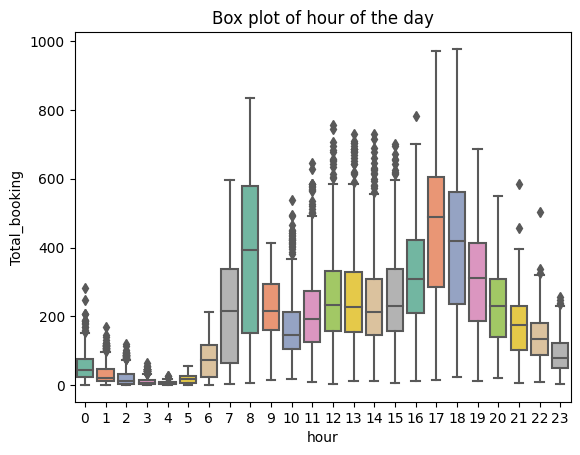

In [17]:
# Box plot - Hour
sns.boxplot(x='hour', y = 'Total_booking', data=train_df, palette="Set2")
#sns.set_style('whitegrid')
plt.title('Box plot of hour of the day')
plt.suptitle('')
plt.show()

Inference: Hour Box plot

there were huge cab bookings during the peak hours between 10 AM until 15 PM and also late hours between 0 until 3

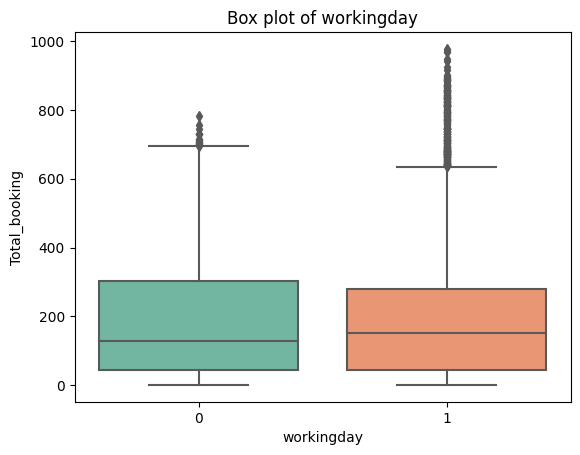

In [18]:
# Box plot - Working Day
sns.boxplot(x="workingday", y="Total_booking", data=train_df, palette="Set2")
#sns.set_style('whitegrid')
plt.title('Box plot of workingday')
plt.suptitle('')
plt.show()

Inference: WorkingDay Box plot

As the WorkingDay is a binary column with only values 0 or 1, there is no significant difference in the distribution of the numerical data for the two values of 'workingday'.

In [19]:
# Box plot - Season
fig = px.box(x="temp", y="Total_booking", data_frame=train_df, color="temp", notched=True)
fig.show()

Inference: Temperature Box plot
As the Temparature rises, the Cab bookings increased, until it is not very high temparatures. 

In [20]:
# Box plot - aTemp
fig = px.box(x="atemp", y="Total_booking", data_frame=train_df, color="atemp", notched=True)
fig.show()

In [21]:
# Box plot - Humidity
fig = px.box(x="humidity", y="Total_booking", data_frame=train_df, color="humidity", notched=True)
fig.show()

In [22]:
# Box plot - Windspeed
fig = px.box(x="windspeed", y="Total_booking", data_frame=train_df, color="windspeed", notched=True)
fig.show()

## b. Remove the outliers present in the dataset

In [23]:
# Removal of Outliers for Season feature
q1 = train_df.groupby('season')['Total_booking'].quantile(0.25)
q3 = train_df.groupby('season')['Total_booking'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print(" Season minimum limit is :", lower)
print(" Season maximum limit is :", upper)
outliers = train_df[((train_df['season'] == 'Spring') & ((train_df['Total_booking'] < lower['Spring']) |
                                                         (train_df['Total_booking'] > upper['Spring']))) | 
                                                          ((train_df['season'] == 'Summer') & ((train_df['Total_booking'] < lower['Summer']) | 
                                                           (train_df['Total_booking'] > upper['Summer']))) | 
                                                            ((train_df['season'] == 'Fall') & ((train_df['Total_booking'] < lower['Fall']) | 
                                                             (train_df['Total_booking'] > upper['Fall']))) | 
                                                              ((train_df['season'] == 'Winter') & ((train_df['Total_booking'] < lower['Winter']) |
                                                                                             (train_df['Total_booking'] > upper['Winter'])))].index

train_feature_without_outlier = train_df.drop(outliers)
fig = px.box(x='season', y="Total_booking", data_frame=train_feature_without_outlier, color="season", notched=True, category_orders={"season": ["Summer", "Spring", "Fall", "Winter"]})
fig.show()

 Season minimum limit is : season
Fall     -356.000
Spring   -181.625
Summer   -368.500
Winter   -313.500
Name: Total_booking, dtype: float64
 Season maximum limit is : season
Fall      772.000
Spring    371.375
Summer    739.500
Winter    664.500
Name: Total_booking, dtype: float64


<Axes: xlabel='hour', ylabel='Total_booking'>

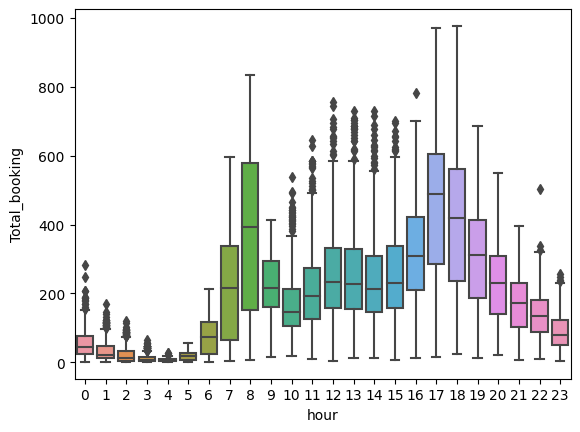

In [24]:
# Removal of Outliers for Hour feature
# identify the outliers for Hour_of_day using the IQR method
train_feature_without_outlier = pd.DataFrame()
for hour in train_df['hour'].unique():
    q1 = train_df.loc[train_df['hour'] == hour]['Total_booking'].quantile(0.25)
    q3 = train_df.loc[train_df['hour'] == hour]['Total_booking'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    outliers = train_df.loc[(train_df['hour'] == hour) & ((train_df['Total_booking'] < lower) | (train_df['Total_booking'] > upper))].index
    train_feature_without_outlier = train_df.drop(outliers)
# re-plot box plot for Hour_of_day to identify outliers
sns.boxplot(x='hour', y='Total_booking', data=train_feature_without_outlier)

# 5. Perform Correlation Analysis

### a. Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity","windspeed"]

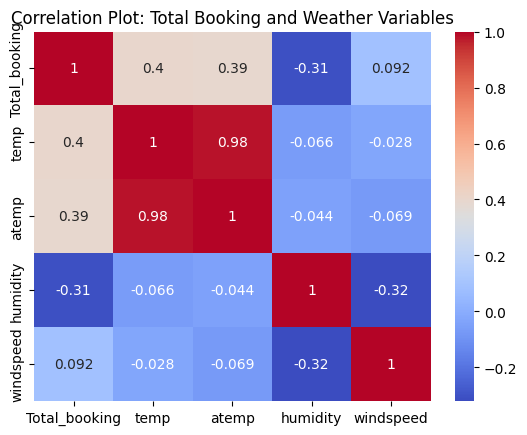

In [25]:
# take all columns of interest to calculate the correlation
cols_for_corr = ['Total_booking', 'temp', 'atemp', 'humidity', 'windspeed']
# calculate the correlation
correlation_matrix = train_df[cols_for_corr].corr()
# plot heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot: Total Booking and Weather Variables')
plt.show()

### b. Inference: Correlation

*   Temperature: We can infer from a positive correlation coefficient between temperature and total bookings that there is a tendency for more cab bookings to occur when temperatures are higher. This suggests that customers are more likely to book a cab when it's warm outside.
*   Feels-like temperature (atemp): Similar to temperature, we can infer from a positive correlation between atemp and total bookings that customers are more likely to book a cab when it feels warmer outside.
*   Humidity: The negative correlation coefficient between humidity and total bookings suggests that as humidity levels increase, cab bookings decrease. 
*   Windspeed: The weak correlation coefficient between windspeed and total bookings suggests that there is little to no relationship between these two variables.



# 6. Perform Data Visualization

### a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well

Distribution plot using Histogram


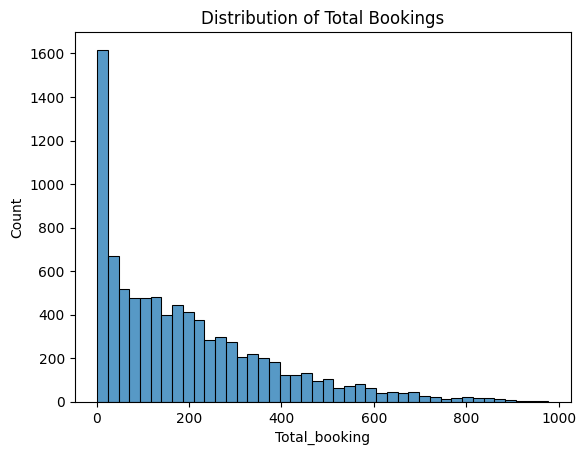

Distribution plot using Dist Plot


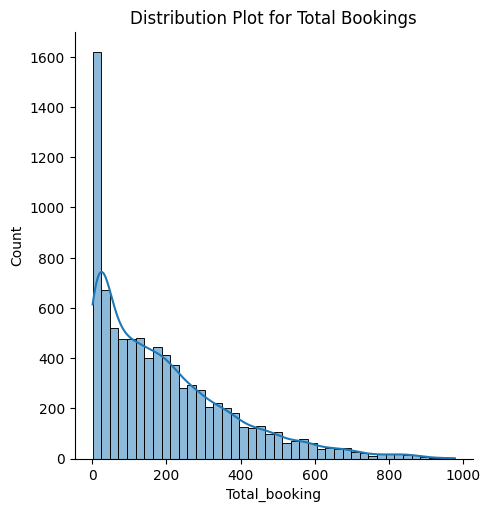

Probabillity distribution plot using kernel density estimate (KDE) Plot


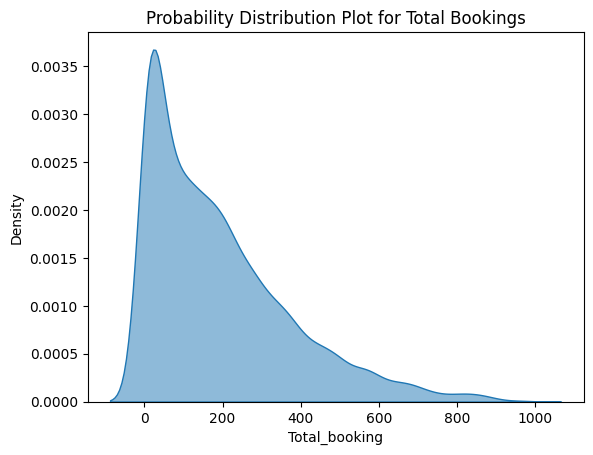

In [33]:
#Plot distribution of total_booking column data.
print("Distribution plot using Histogram")
sns.histplot(data=train_df, x="Total_booking")
plt.title('Distribution of Total Bookings')
plt.show()

# fig = px.histogram(train_df, x="Total_booking", nbins=50,  histnorm='probability density')
# fig.update_layout(title="Distribution of Total Bookings")
# fig.show()
print('Distribution plot using Dist Plot')
sns.displot(data=train_df, x="Total_booking", kde=True)
plt.title('Distribution Plot for Total Bookings')
plt.show()

print('Probabillity distribution plot using kernel density estimate (KDE) Plot')
sns.kdeplot(data=train_df, x="Total_booking", fill=True, alpha=0.5)
plt.title('Probability Distribution Plot for Total Bookings')
plt.show()

### b. Visualize total_booking vs (Month,Season,Hour,Weekday,Usertype)

In [35]:
cols_of_interest = ['Total_booking', 'month', 'season', 'hour', 'weekDay']
train_df_subset = train_df[cols_of_interest]

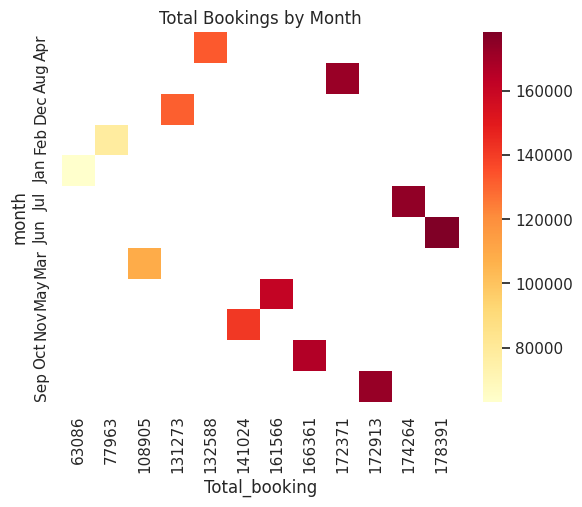

In [55]:
# Visualize 
sns.set(style="white")
df_month = train_df.groupby(['month']).agg({'Total_booking': 'sum'}).reset_index()
df_month['month'] = df_month['month'].apply(lambda x: calendar.month_abbr[x])
sorted(df_month['month'])
df_month = df_month.pivot(index='month', columns='Total_booking', values='Total_booking')
sns.heatmap(df_month, cmap='YlOrRd')
plt.title('Total Bookings by Month')
plt.show()

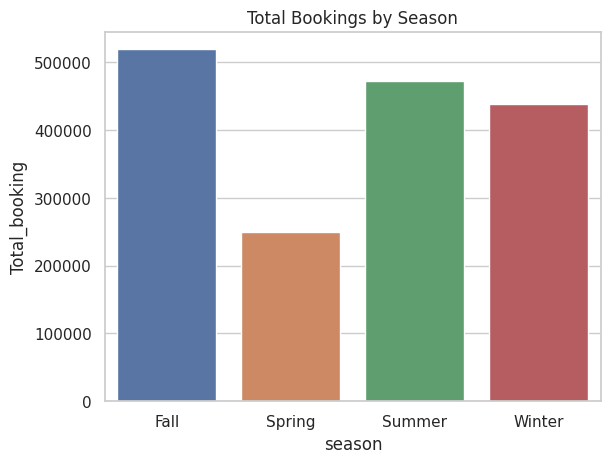

In [47]:
sns.set(style="whitegrid")
df_season = train_df_subset.groupby(['season']).agg({'Total_booking': 'sum'}).reset_index()
sns.barplot(data=df_season, x='season', y='Total_booking')
plt.title('Total Bookings by Season')
plt.show()

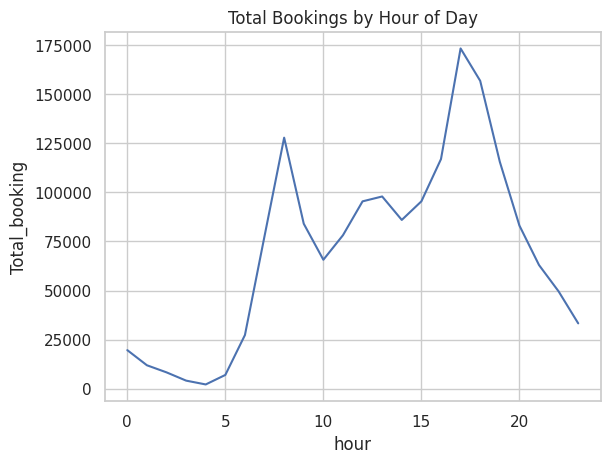

In [48]:
sns.set(style="whitegrid")
df_hour = train_df_subset.groupby(['hour']).agg({'Total_booking': 'sum'}).reset_index()
sns.lineplot(data=df_hour, x='hour', y='Total_booking')
plt.title('Total Bookings by Hour of Day')
plt.show()

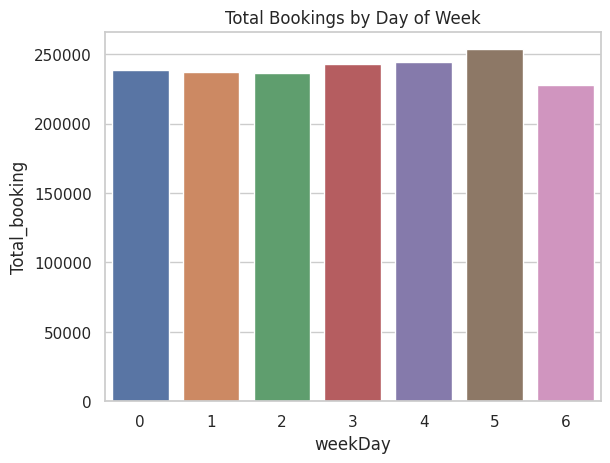

In [49]:
sns.set(style="whitegrid")
df_weekday = train_df_subset.groupby(['weekDay']).agg({'Total_booking': 'sum'}).reset_index()
df_weekday['weekday'] = df_weekday['weekDay'].apply(lambda x: calendar.day_name[x])
sns.barplot(data=df_weekday, x='weekDay', y='Total_booking')
plt.title('Total Bookings by Day of Week')
plt.show()

### c. Use Histograms to plot all the continuous variables present in the data

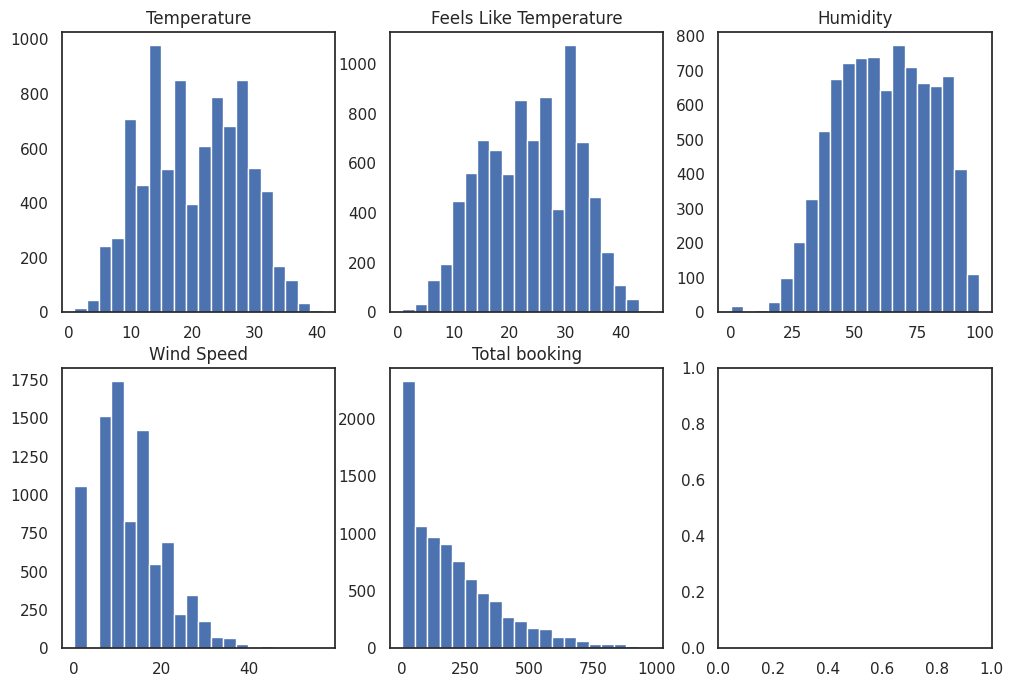

In [56]:
# Create histograms for all continuous variables
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].hist(train_df['temp'], bins=20)
axs[0, 0].set_title('Temperature')
axs[0, 1].hist(train_df['atemp'], bins=20)
axs[0, 1].set_title('Feels Like Temperature')
axs[0, 2].hist(train_df['humidity'], bins=20)
axs[0, 2].set_title('Humidity')
axs[1, 0].hist(train_df['windspeed'], bins=20)
axs[1, 0].set_title('Wind Speed')
axs[1, 1].hist(train_df['Total_booking'], bins=20)
axs[1, 1].set_title('Total booking')
plt.show()

# 7. Convert the categorical variables into one hot vector

In [71]:
category_cols_of_interest = ['season', 'holiday', 'workingday', 'weather']

# Initialize OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
onehot_encoded = onehot_encoder.fit_transform(train_df[category_cols_of_interest])

# Convert the one-hot encoded array to a DataFrame and add column names
onehot_df = pd.DataFrame(onehot_encoded, columns=[col + '_' + str(cat).strip() for col in category_cols_of_interest for cat in onehot_encoder.categories_[category_cols_of_interest.index(col)]])

# Concatenate the original DataFrame with the one-hot encoded DataFrame
train_df = pd.concat([train_df.drop(category_cols_of_interest, axis=1), onehot_df], axis=1)
train_df.dtypes

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



index                                  int64
datetime                              object
temp                                 float64
atemp                                float64
humidity                               int64
windspeed                            float64
Total_booking                          int64
season_Fall                          float64
season_Spring                        float64
season_Summer                        float64
season_Winter                        float64
holiday_0                            float64
holiday_1                            float64
workingday_0                         float64
workingday_1                         float64
weather_Clear + Few clouds           float64
weather_Heavy Rain + Thunderstorm    float64
weather_Light Snow, Light Rain       float64
weather_Mist + Cloudy                float64
dtype: object